In [32]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

 Load and preprocess the dataset

In [33]:
#Importing the data set
df=pd.read_csv("Medical Price Dataset.csv")
#To see the first five rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
#To see the last five rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [35]:
#Find no of rows and colunms present on the data set
df.shape

(1338, 7)

In [36]:
#To get the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
#To check the null values
df.isnull().sum()
#Here no null values present on the data set

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visualize the data


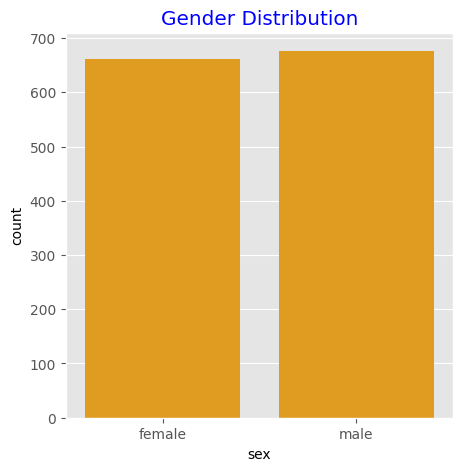

In [38]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df,color='orange')
plt.title('Gender Distribution',color='Blue')
plt.show()

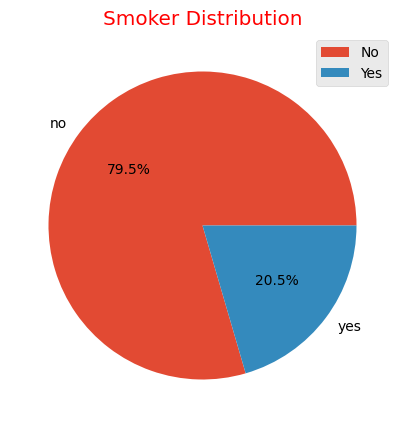

In [39]:
plt.figure(figsize=(5, 5))#creates a new figure with a size of 5 inches by 5 inches
smoker_counts = df['smoker'].value_counts()#calculates the count of each category in the 'smoker' column
smoker_counts.plot(kind='pie', autopct='%1.1f%%')#autopct='%1.1f%%' argument adds percentage labels to each slice of the piechart

# Add "Yes" and "No" labels
plt.legend(labels=['No', 'Yes'], loc='upper right')
plt.title('Smoker Distribution',color="Red")# set the title of the plot to 'Smoker Distribution'
plt.ylabel('')#removes the label for the y-axis.
plt.show()

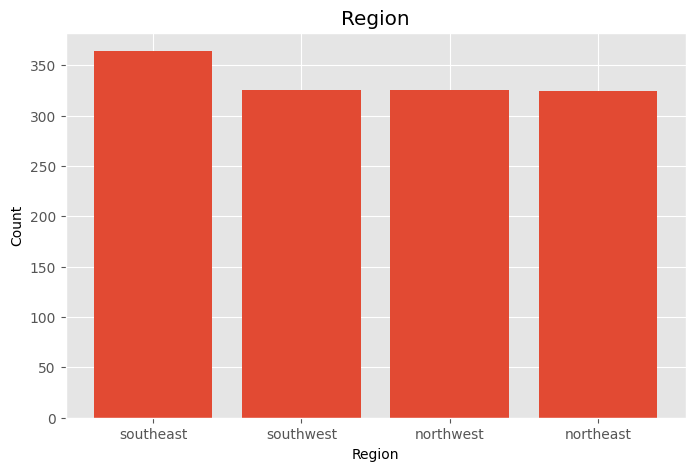

In [40]:
plt.figure(figsize=(8, 5))
plt.bar(df['region'].value_counts().index, df['region'].value_counts().values)
plt.title('Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


Text(0.5, 1.0, 'Cost vs Region')

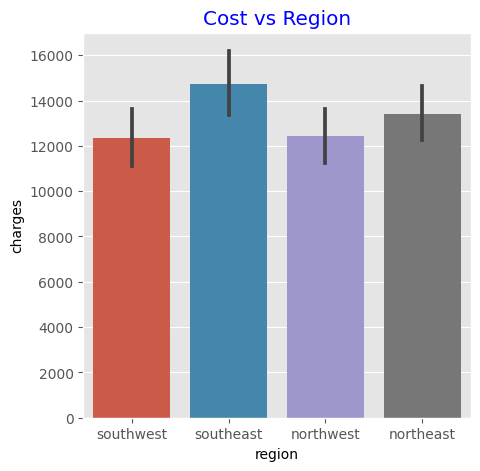

In [41]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region',color='Blue')

Text(0.5, 1.0, 'Charges for smokers')

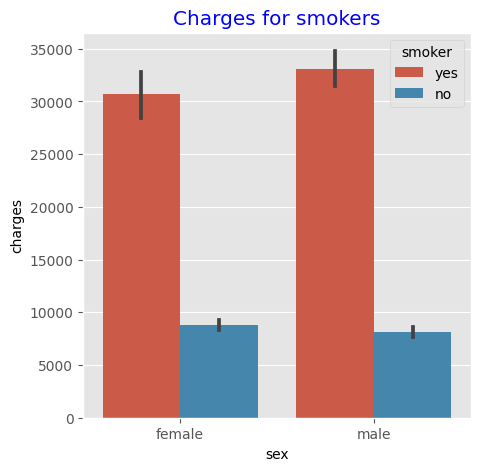

In [42]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers',color='Blue')

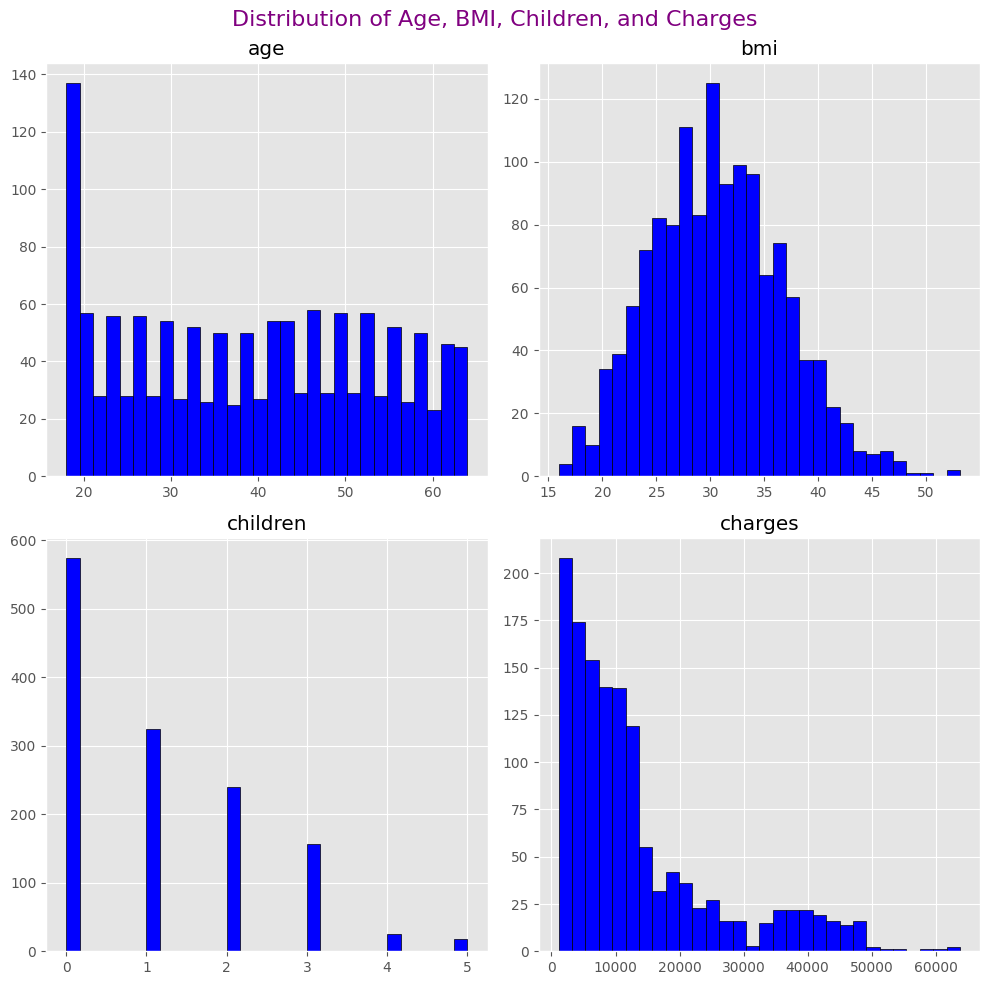

In [43]:
df[['age', 'bmi', 'children', 'charges']].hist(bins=30, figsize=(10, 10), color='blue', edgecolor='black')#creates a histogram for each of the 'age', 'bmi', 'children', and 'charges' columns

plt.suptitle('Distribution of Age, BMI, Children, and Charges', fontsize=16,color="purple")#add a centered title above the subplots
plt.tight_layout()#adjust the spacing between the subplots
plt.show()

In [44]:
#To get the overall statistics about the data set
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [45]:
df.dropna(inplace=True)

Convert columns from string['Sex','Smoker','region'] To numerical values

In [46]:
df['sex']=df['sex'].apply({'female':0,'male':1}.get)
df['smoker']=df['smoker'].apply({'yes':1,'no':0}.get)
df['region']=df['region'].apply({'southwest':'1','southeast':'2', 'northwest':'3','northeast':'4'}.get)

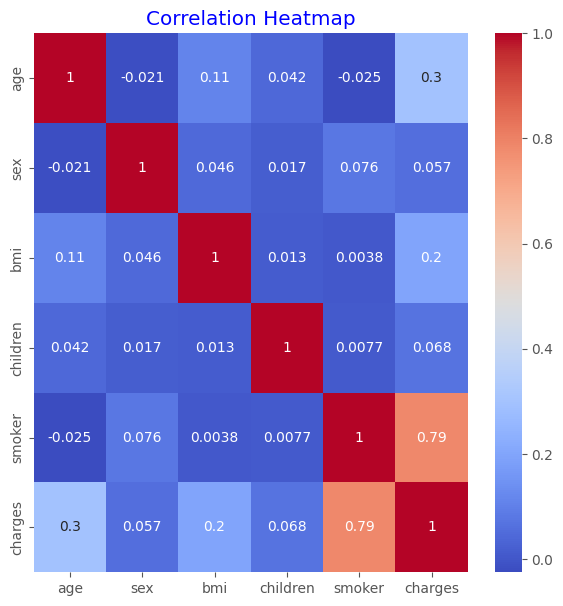

In [47]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap',color="Blue",)
plt.show()


In [48]:
X = df.drop(['charges', 'sex'], axis=1)#creates a new DataFrame X by dropping the 'charges' and 'sex' columns 
y = df.charges #creates a new Series y by extracting the 'charges' column

Implement the train-test split function

In [49]:
def train_test_split(X, y, test_size=0.2, n_samples=1000,random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = X.shape[0]
    n_test = int(np.ceil(test_size * n_samples))
    test_indices = np.random.choice(np.arange(n_samples), size=n_test, replace=False)
    train_indices = np.setdiff1d(np.arange(n_samples), test_indices)
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test



Implement the linear regression algorithm

In [50]:
def linear_regression(X, y):
   
    
# Convert X and y to numeric arrays
    X_extended = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    X_extended = X_extended.astype(float)
    y = y.astype(float)

# Calculate the coefficients using matrix operations
    coefficients = np.linalg.inv(X_extended.T.dot(X_extended)).dot(X_extended.T).dot(y)
    return coefficients

Split the dataset into training and testing sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)


In [52]:
X_train

array([[19, 27.9, 0, 1, '1'],
       [18, 33.77, 1, 0, '2'],
       [28, 33.0, 3, 0, '2'],
       ...,
       [18, 36.85, 0, 0, '2'],
       [21, 25.8, 0, 0, '1'],
       [61, 29.07, 0, 1, '3']], dtype=object)

In [53]:
y_test

array([ 9095.06825 ,  5272.1758  , 29330.98315 ,  9301.89355 ,
       33750.2918  ,  4536.259   ,  2117.33885 , 14210.53595 ,
        3732.6251  , 10264.4421  , 18259.216   ,  7256.7231  ,
        3947.4131  , 46151.1245  , 48673.5588  , 44202.6536  ,
        9800.8882  , 42969.8527  ,  8233.0975  , 21774.32215 ,
        5080.096   ,  7441.501   ,  1256.299   ,  2755.02095 ,
       11085.5868  , 10923.9332  , 12644.589   , 18804.7524  ,
        9715.841   ,  1131.5066  , 15828.82173 , 11842.62375 ,
        2020.5523  ,  5693.4305  ,  2904.088   ,  7448.40395 ,
        2597.779   ,  7337.748   , 23887.6627  , 38709.176   ,
        4687.797   ,  2643.2685  , 11674.13    , 12124.9924  ,
        4889.9995  , 12333.828   ,  3579.8287  ,  4391.652   ,
       42124.5153  ,  4463.2051  , 13887.204   ,  1719.4363  ,
       28476.73499 ,  1708.92575 , 10594.2257  , 25333.33284 ,
        3645.0894  , 38746.3551  , 11848.141   , 10564.8845  ,
       13880.949   ,  4753.6368  , 27941.28758 ,  8017.

 Train the linear regression model

In [54]:
coefficients = linear_regression(X_train, y_train)


 Make predictions on the test set

In [55]:

# Convert X_test_extended and coefficients to numeric arrays
X_test_extended = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
X_test_extended = X_test_extended.astype(float)
coefficients = coefficients.astype(float)

# Calculate the predictions
y_pred = X_test_extended.dot(coefficients)



 Evaluate the model

In [56]:
# Calculate R-squared
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print("R-squared:", r_squared)


R-squared: 0.7833112270019786


Visualize the actual vs. predicted prices

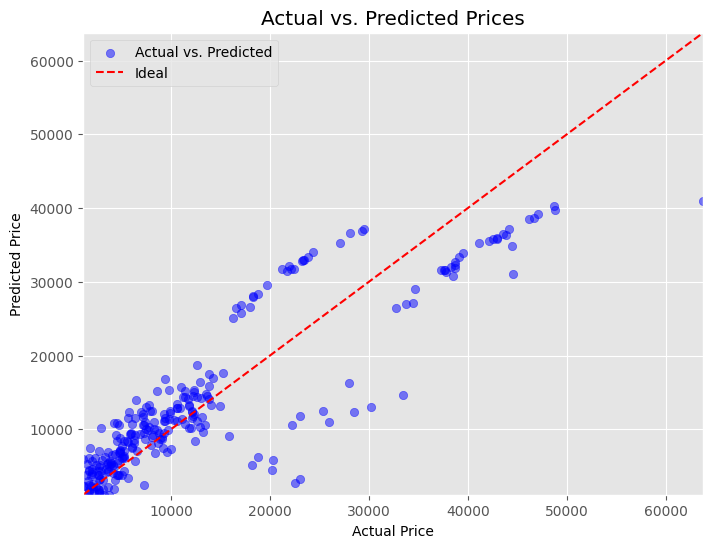

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_test), max(y_test))
plt.show()

